# 한국 부동산 데이터 시각 경진대회

https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## 지역별 지가 변동률

In [3]:
# 데이터 로드
region=pd.read_csv('data/realestate/지역별_지가변동률.csv',parse_dates=True)
region.shape

(194, 19)

In [4]:
region.head()

,Unnamed: 0,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
1,2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2,2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
3,2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
4,2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247


In [5]:
# 데이터 타입 확인
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    object 
 1   전국[%]       194 non-null    float64
 2   서울[%]       194 non-null    float64
 3   부산[%]       194 non-null    float64
 4   대구[%]       194 non-null    float64
 5   인천[%]       194 non-null    float64
 6   광주[%]       194 non-null    float64
 7   대전[%]       194 non-null    float64
 8   울산[%]       194 non-null    float64
 9   세종[%]       104 non-null    float64
 10  경기[%]       194 non-null    float64
 11  강원[%]       194 non-null    float64
 12  충북[%]       194 non-null    float64
 13  충남[%]       194 non-null    float64
 14  전북[%]       194 non-null    float64
 15  전남[%]       194 non-null    float64
 16  경북[%]       194 non-null    float64
 17  경남[%]       194 non-null    float64
 18  제주[%]       194 non-null    float64
dtypes: float64(18), object(1)
mem

In [6]:
# object타입의 날짜 컬럼을 date타입으로 변경 후 컬럼명 변경
region.iloc[:,0]=pd.to_datetime(region.iloc[:,0])
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  194 non-null    datetime64[ns]
 1   전국[%]       194 non-null    float64       
 2   서울[%]       194 non-null    float64       
 3   부산[%]       194 non-null    float64       
 4   대구[%]       194 non-null    float64       
 5   인천[%]       194 non-null    float64       
 6   광주[%]       194 non-null    float64       
 7   대전[%]       194 non-null    float64       
 8   울산[%]       194 non-null    float64       
 9   세종[%]       104 non-null    float64       
 10  경기[%]       194 non-null    float64       
 11  강원[%]       194 non-null    float64       
 12  충북[%]       194 non-null    float64       
 13  충남[%]       194 non-null    float64       
 14  전북[%]       194 non-null    float64       
 15  전남[%]       194 non-null    float64       
 16  경북[%]       194 non-null  

In [7]:
# 지역컬럼명의 % 를 제거
region.rename(columns=lambda x: x[:-3], inplace=True)
region.columns

Index(['Unnamed', '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype='object')

In [8]:
# 날짜컬럼명 변경
region=region.rename({'Unnamed':'날짜'},axis='columns')
region.columns

Index(['날짜', '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype='object')

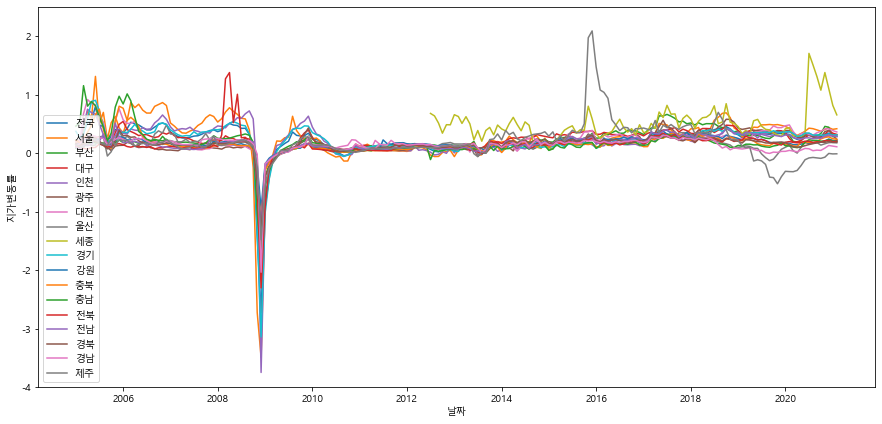

In [27]:
plt.figure(figsize=(15,7))
for i in enumerate(tempre):
    sns.lineplot(region['날짜'],region[i[1]])
plt.legend(tempre)
plt.ylim(-4, 2.5)
plt.ylabel("지가변동률")
plt.show()

* 모든 지역의 지가변동률을 하나의 그래프로 표현하면 어떤 지역이 다른 특징을 지니고 변동하였는지 알기 어려우므로 각 지역별 변동률을 알아볼수 있도록 개별 그래프로 그림

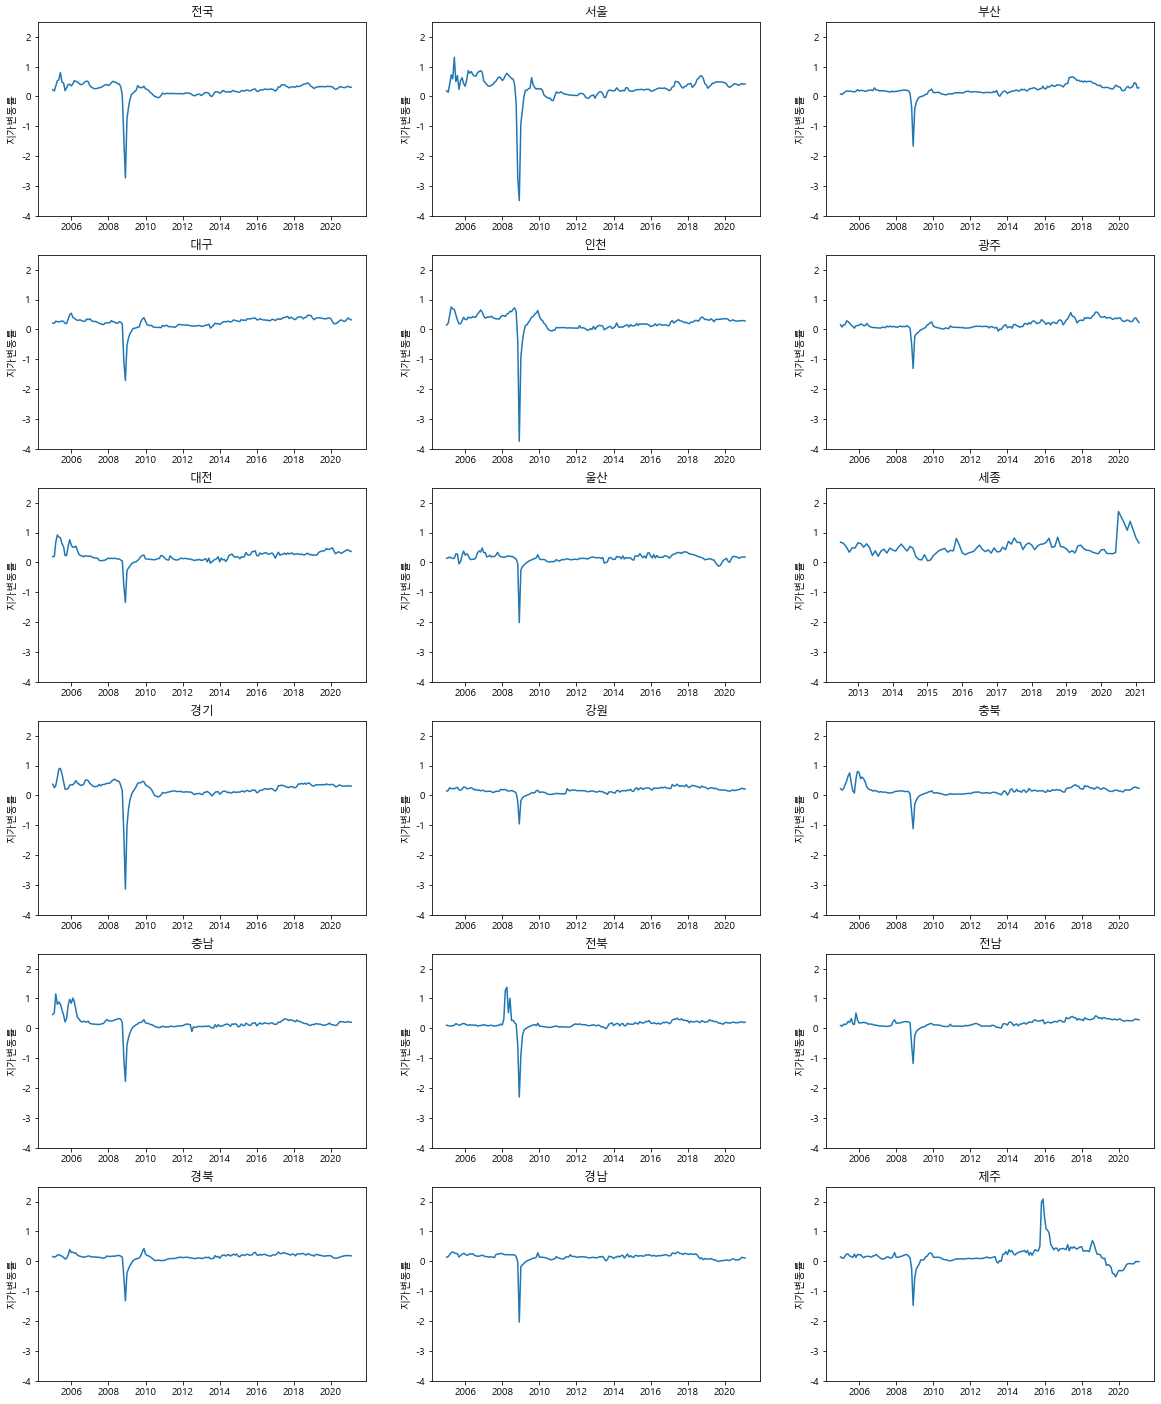

In [13]:
#각 지역별 지가 변동률과 전국 지가변동률 표현
plt.figure(figsize=(20,25))
tempre=region.columns[1:]
for i in enumerate(tempre):
    plt.subplot(6,3,i[0]+1)
    plt.plot(region['날짜'],region[i[1]])
    plt.ylim(-4, 2.5)
    plt.title(i[1])
    plt.ylabel("지가변동률")

<div class="alert alert-block alert-info">
<b>Insight:</b> <br> 지가 변동폭을 다르지만 대부분의 지역이 비슷한 형태를 보이고 있으나 제주와 세종 지역은 다른 지역들과는 다른 지가 변동률 등락을 보이고 있다.
</div>

## 건축허가현황

In [28]:
# 데이터 로드
const=pd.read_csv('data/realestate/건축허가현황.csv',parse_dates=True)
const.shape

(247, 23)

In [29]:
const.head()

,Unnamed: 0,연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],연면적-자재별[㎡],연면적-용도별[㎡],동수-철근·철골조[동수],동수-조적조[동수],동수-목조[동수],동수-기타(자재별)[동수],동수-주거용[동수],동수-상업용[동수],동수-공업용[동수],동수-교육및사회용[동수],동수-기타(용도별)[동수],동수-자재별[동수],동수-용도별[동수]
0,2000-08-01,3898712.0,122063.0,5229.0,287185.0,1812355.0,1088979.0,687577.0,0.0,724278.0,4313189.0,4313189.0,4319.0,1216.0,58.0,1078.0,2905.0,2008.0,741.0,0.0,1017.0,6671.0,6671.0
1,2000-09-01,3055754.0,113586.0,5918.0,236449.0,1273430.0,1014900.0,702592.0,0.0,420785.0,3411707.0,3411707.0,3910.0,1128.0,70.0,793.0,2653.0,1756.0,652.0,0.0,840.0,5901.0,5901.0
2,2000-10-01,4104565.0,134648.0,8006.0,314620.0,1908535.0,1095874.0,1011477.0,0.0,545953.0,4561839.0,4561839.0,4970.0,1290.0,61.0,1183.0,3246.0,2264.0,874.0,0.0,1120.0,7504.0,7504.0
3,2000-11-01,4337103.0,108212.0,7727.0,283128.0,2415543.0,1164943.0,613744.0,0.0,541940.0,4736170.0,4736170.0,4497.0,1128.0,62.0,1088.0,2801.0,2050.0,816.0,0.0,1108.0,6775.0,6775.0
4,2000-12-01,6027008.0,161879.0,26079.0,453178.0,3450325.0,1412322.0,1069299.0,0.0,736198.0,6668144.0,6668144.0,3581.0,941.0,70.0,986.0,2080.0,1619.0,748.0,0.0,1131.0,5578.0,5578.0


In [30]:
# 데이터 타입 확인
const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      247 non-null    object 
 1   연면적-철근·철골조[㎡]   247 non-null    float64
 2   연면적-조적조[㎡]      247 non-null    float64
 3   연면적-목조[㎡]       247 non-null    float64
 4   연면적-기타(자재별)[㎡]  247 non-null    float64
 5   연면적-주거용[㎡]      247 non-null    float64
 6   연면적-상업용[㎡]      247 non-null    float64
 7   연면적-공업용[㎡]      247 non-null    float64
 8   연면적-교육및사회용[㎡]   247 non-null    float64
 9   연면적-기타(용도별)[㎡]  247 non-null    float64
 10  연면적-자재별[㎡]      247 non-null    float64
 11  연면적-용도별[㎡]      247 non-null    float64
 12  동수-철근·철골조[동수]   247 non-null    float64
 13  동수-조적조[동수]      247 non-null    float64
 14  동수-목조[동수]       247 non-null    float64
 15  동수-기타(자재별)[동수]  247 non-null    float64
 16  동수-주거용[동수]      247 non-null    float64
 17  동수-상업용[동수]      247 non-null    flo

In [31]:
# object타입의 날짜 컬럼을 date타입으로 변경 후 컬럼명 변경
const.iloc[:,0]=pd.to_datetime(region.iloc[:,0])
const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      194 non-null    datetime64[ns]
 1   연면적-철근·철골조[㎡]   247 non-null    float64       
 2   연면적-조적조[㎡]      247 non-null    float64       
 3   연면적-목조[㎡]       247 non-null    float64       
 4   연면적-기타(자재별)[㎡]  247 non-null    float64       
 5   연면적-주거용[㎡]      247 non-null    float64       
 6   연면적-상업용[㎡]      247 non-null    float64       
 7   연면적-공업용[㎡]      247 non-null    float64       
 8   연면적-교육및사회용[㎡]   247 non-null    float64       
 9   연면적-기타(용도별)[㎡]  247 non-null    float64       
 10  연면적-자재별[㎡]      247 non-null    float64       
 11  연면적-용도별[㎡]      247 non-null    float64       
 12  동수-철근·철골조[동수]   247 non-null    float64       
 13  동수-조적조[동수]      247 non-null    float64       
 14  동수-목조[동수]       247 non-null    float64       
 15  동수-기타(

In [37]:
domestic=pd.read_csv('data/realestate/국내건설수주액.csv',parse_dates=True)
domestic.head()

,Unnamed: 0,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],민자[백만원],건축[백만원],주택[백만원],사무실 및 점포[백만원],공장 및 창고[백만원],관공서[백만원],기타[백만원],토목[백만원],치산 및 치수[백만원],농림 및 수산[백만원],도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
0,1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,NaN,2231.0,186.0,928.0,862.0,239.0,16.0,10361.0,1.0,225.0,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1,1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,NaN,3762.0,246.0,847.0,1955.0,85.0,629.0,4468.0,5.0,144.0,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
2,1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,NaN,11678.0,3706.0,2217.0,3454.0,1308.0,993.0,10583.0,253.0,4107.0,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
3,1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,30.0,NaN,25276.0,13984.0,6724.0,1556.0,2403.0,609.0,20644.0,413.0,1394.0,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
4,1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,203.0,NaN,16548.0,5521.0,2021.0,1703.0,6268.0,1035.0,32444.0,1987.0,345.0,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


In [38]:
unsold=pd.read_csv('data/realestate/미분양주택현황.csv',parse_dates=True) 
unsold.head()

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
1,2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2,2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
3,2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
4,2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN


In [39]:
realprice=pd.read_csv('data/realestate/아파트 실거래가격지수.csv',parse_dates=True) 
realprice.head()

,Unnamed: 0,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],세종[2017.11=100],경기[2017.11=100],강원[2017.11=100],충북[2017.11=100],충남[2017.11=100],서북권[2017.11=100],서남권[2017.11=100],전북[2017.11=100],전남[2017.11=100],경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],광역시[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
0,2006-01-01,59.3,59.0,62.0,49.7,62.5,62.4,54.2,76.1,48.8,69.8,69.2,61.2,65.2,75.4,57.1,59.9,57.0,51.0,66.3,63.0,38.7,NaN,55.8,62.3,62.0,60.6,65.4,59.1
1,2006-02-01,58.1,59.3,63.8,49.4,62.6,62.8,53.9,75.6,48.9,69.7,70.5,61.8,66.4,76.2,57.2,61.1,57.3,50.7,66.2,62.9,37.6,NaN,55.7,62.6,62.7,61.7,66.6,59.2
2,2006-03-01,59.5,59.5,66.4,49.1,62.4,63.2,53.8,74.9,49.8,72.9,71.4,59.9,66.9,77.0,57.9,62.9,58.0,51.1,66.3,63.2,35.8,NaN,55.6,62.7,63.3,63.2,67.7,59.2
3,2006-04-01,59.5,59.7,67.9,48.6,62.3,63.7,53.7,74.2,50.3,69.7,72.2,60.8,67.7,77.0,58.1,64.6,58.3,51.4,66.1,62.8,36.1,NaN,55.4,62.9,63.8,64.1,68.4,59.2
4,2006-05-01,61.4,59.6,67.1,48.2,62.0,64.1,53.0,73.8,51.6,72.3,73.3,61.8,67.3,75.0,58.7,65.3,58.4,52.7,66.1,62.7,36.5,NaN,55.3,62.9,64.1,64.1,69.0,59.1


In [40]:
typeprice=pd.read_csv('data/realestate/유형별_주택월세통합가격지수.csv',parse_dates=True) 
typeprice.head()

,Unnamed: 0,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],종합-광주[2017.11=100],종합-대전[2017.11=100],종합-울산[2017.11=100],종합-세종[2017.11=100],종합-강원[2017.11=100],종합-충북[2017.11=100],종합-충남[2017.11=100],종합-전북[2017.11=100],종합-전남[2017.11=100],종합-경북[2017.11=100],종합-경남[2017.11=100],종합-제주[2017.11=100],종합-6대광역시[2017.11=100],종합-9개도[2017.11=100],아파트-전국[2017.11=100],아파트-수도권[2017.11=100],아파트-지방[2017.11=100],아파트-5대광역시[2017.11=100],아파트-8개도[2017.11=100],아파트-서울[2017.11=100],아파트-경기[2017.11=100],아파트-인천[2017.11=100],아파트-부산[2017.11=100],아파트-대구[2017.11=100],아파트-광주[2017.11=100],아파트-대전[2017.11=100],아파트-울산[2017.11=100],아파트-세종[2017.11=100],아파트-강원[2017.11=100],아파트-충북[2017.11=100],아파트-충남[2017.11=100],아파트-전북[2017.11=100],아파트-전남[2017.11=100],아파트-경북[2017.11=100],아파트-경남[2017.11=100],아파트-제주[2017.11=100],아파트-6대광역시[2017.11=100],아파트-9개도[2017.11=100],연립다세대-전국[2017.11=100],연립다세대-수도권[2017.11=100],연립다세대-지방[2017.11=100],연립다세대-5대광역시[2017.11=100],연립다세대-8개도[2017.11=100],연립다세대-서울[2017.11=100],연립다세대-경기[2017.11=100],연립다세대-인천[2017.11=100],연립다세대-부산[2017.11=100],연립다세대-대구[2017.11=100],연립다세대-광주[2017.11=100],연립다세대-대전[2017.11=100],연립다세대-울산[2017.11=100],연립다세대-세종[2017.11=100],연립다세대-강원[2017.11=100],연립다세대-충북[2017.11=100],연립다세대-충남[2017.11=100],연립다세대-전북[2017.11=100],연립다세대-전남[2017.11=100],연립다세대-경북[2017.11=100],연립다세대-경남[2017.11=100],연립다세대-제주[2017.11=100],연립다세대-6대광역시[2017.11=100],연립다세대-9개도[2017.11=100],단독주택-전국[2017.11=100],단독주택-수도권[2017.11=100],단독주택-지방[2017.11=100],단독주택-5대광역시[2017.11=100],단독주택-8개도[2017.11=100],단독주택-서울[2017.11=100],단독주택-경기[2017.11=100],단독주택-인천[2017.11=100],단독주택-부산[2017.11=100],단독주택-대구[2017.11=100],단독주택-광주[2017.11=100],단독주택-대전[2017.11=100],단독주택-울산[2017.11=100],단독주택-세종[2017.11=100],단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
0,2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,100.6,100.2,100.5,NaN,107.6,99.2,101.2,101.2,99.1,100.0,101.7,103.1,98.0,100.0,100.3,100.4,99.5,101.2,100.4,101.8,100.0,99.3,99.0,99.4,101.2,100.5,100.3,101.4,110.5,98.6,101.0,102.7,99.0,99.6,103.3,104.5,97.7,100.1,100.6,99.7,99.5,100.2,100.0,100.4,99.5,99.5,99.1,99.6,99.9,100.4,100.8,101.1,101.5,99.4,101.5,100.7,99.9,100.6,100.8,101.7,97.6,99.6,99.8,100.1,100.0,100.2,100.3,100.1,100.1,100.1,99.9,100.4,99.2,99.4,101.2,102.7,99.5,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
1,2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,100.8,100.2,100.5,NaN,107.6,99.3,101.2,101.2,99.1,100.0,101.7,103.1,98.1,100.1,100.3,100.4,99.5,101.2,100.4,101.8,100.0,99.4,99.0,99.3,101.4,100.5,100.3,101.5,110.4,98.7,101.0,102.7,98.9,99.6,103.3,104.5,97.8,100.1,100.6,99.7,99.5,100.3,100.1,100.4,99.5,99.5,99.3,99.7,100.0,100.2,100.8,101.1,101.5,99.4,101.4,100.8,99.9,100.7,100.8,101.8,97.7,99.7,99.8,100.2,100.0,100.2,100.4,100.2,100.1,100.1,99.9,100.4,99.5,99.4,101.1,102.7,99.5,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2
2,2015-08-01,100.3,99.6,100.9,100.4,101.0,99.9,99.5,99.2,99.7,101.0,100.3,100.5,NaN,107.5,99.3,101.1,101.3,99.2,100.0,101.8,103.2,98.2,100.1,100.4,100.4,99.6,101.3,100.4,101.8,100.0,99.4,99.0,99.4,101.5,100.5,100.2,101.5,110.2,98.7,101.0,102.8,99.0,99.6,103.5,104.5,98.1,100.1,100.6,99.8,99.5,100.3,100.1,100.5,99.6,99.6,99.3,99.7,100.2,100.0,100.8,101.1,101.6,99.3,101.3,100.9,99.9,100.6,101.0,101.9,97.8,99.7,99.9,100.2,100.0,100.2,100.5,100.2,100.0,100.1,99.9,100.4,99.8,99.4,101.1,102.6,99.6,100.1,101.5,99.6,99.3,100.4,100.3,100.8,98.3,100.4,100.2
3,2015-09-01,100.3,99.7,100.9,100.4,101.1,100.0,99.6,99.2,99.7,101.1,100.3,100.4,NaN,107.5,99.4,101.2,101.4,99.3,99.9,102.0,103.3,98.3,100.2,100.5,100.5,99.7,101.4,100.5,102.0,100.2,99.5,99.0,99.5,101.6,100.5,100.1,101.6,110.3,98.8,101.1,102.9,99.2,99.6,103.7,104.6,98.2,100.2,100.7,99.8,99.6,100.4,100.1,100.6,99.7,99.6,99.3,

In [41]:
permit=pd.read_csv('data/realestate/주택건설인허가실적.csv',parse_dates=True) 
permit.head()

,Unnamed: 0,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],인천[호],제주[호],전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호]
0,2007-01-01,12038.0,455.0,188.0,1004.0,818.0,55.0,452.0,1022.0,2647.0,69.0,132.0,888.0,206.0,698.0,1691.0,11718.0,320.0,12038.0,NaN,1530.0,183.0
1,2007-02-01,29789.0,1554.0,493.0,2310.0,3549.0,89.0,642.0,2200.0,5517.0,185.0,232.0,1490.0,700.0,2942.0,4206.0,28311.0,1478.0,29789.0,NaN,2324.0,1356.0
2,2007-03-01,49827.0,3675.0,1187.0,4200.0,4596.0,154.0,1031.0,3547.0,8705.0,1115.0,337.0,2153.0,1091.0,5256.0,6527.0,48285.0,1542.0,49827.0,NaN,4212.0,2041.0
3,2007-04-01,69013.0,4039.0,1651.0,4901.0,5110.0,235.0,2185.0,3773.0,12692.0,4452.0,485.0,2627.0,2310.0,6480.0,7576.0,67439.0,1574.0,69013.0,NaN,6175.0,4322.0
4,2007-05-01,100210.0,4936.0,2331.0,7988.0,5685.0,746.0,2698.0,5844.0,25860.0,4663.0,563.0,3542.0,2663.0,7330.0,12754.0,96172.0,4038.0,100210.0,NaN,8041.0,4566.0


In [42]:
trading=pd.read_csv('data/realestate/주택매매가격지수(KB).csv',parse_dates=True)
trading.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588


In [43]:
jeonse=pd.read_csv('data/realestate/주택전세가격지수(KB).csv',parse_dates=True) 
jeonse.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040
